In [200]:
!pip install -U scikit-learn


In [201]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [202]:
df=pd.read_csv(r"c:\Users\SHREEN\Downloads\credit_customers (1).csv")
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,NaN,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

In [204]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


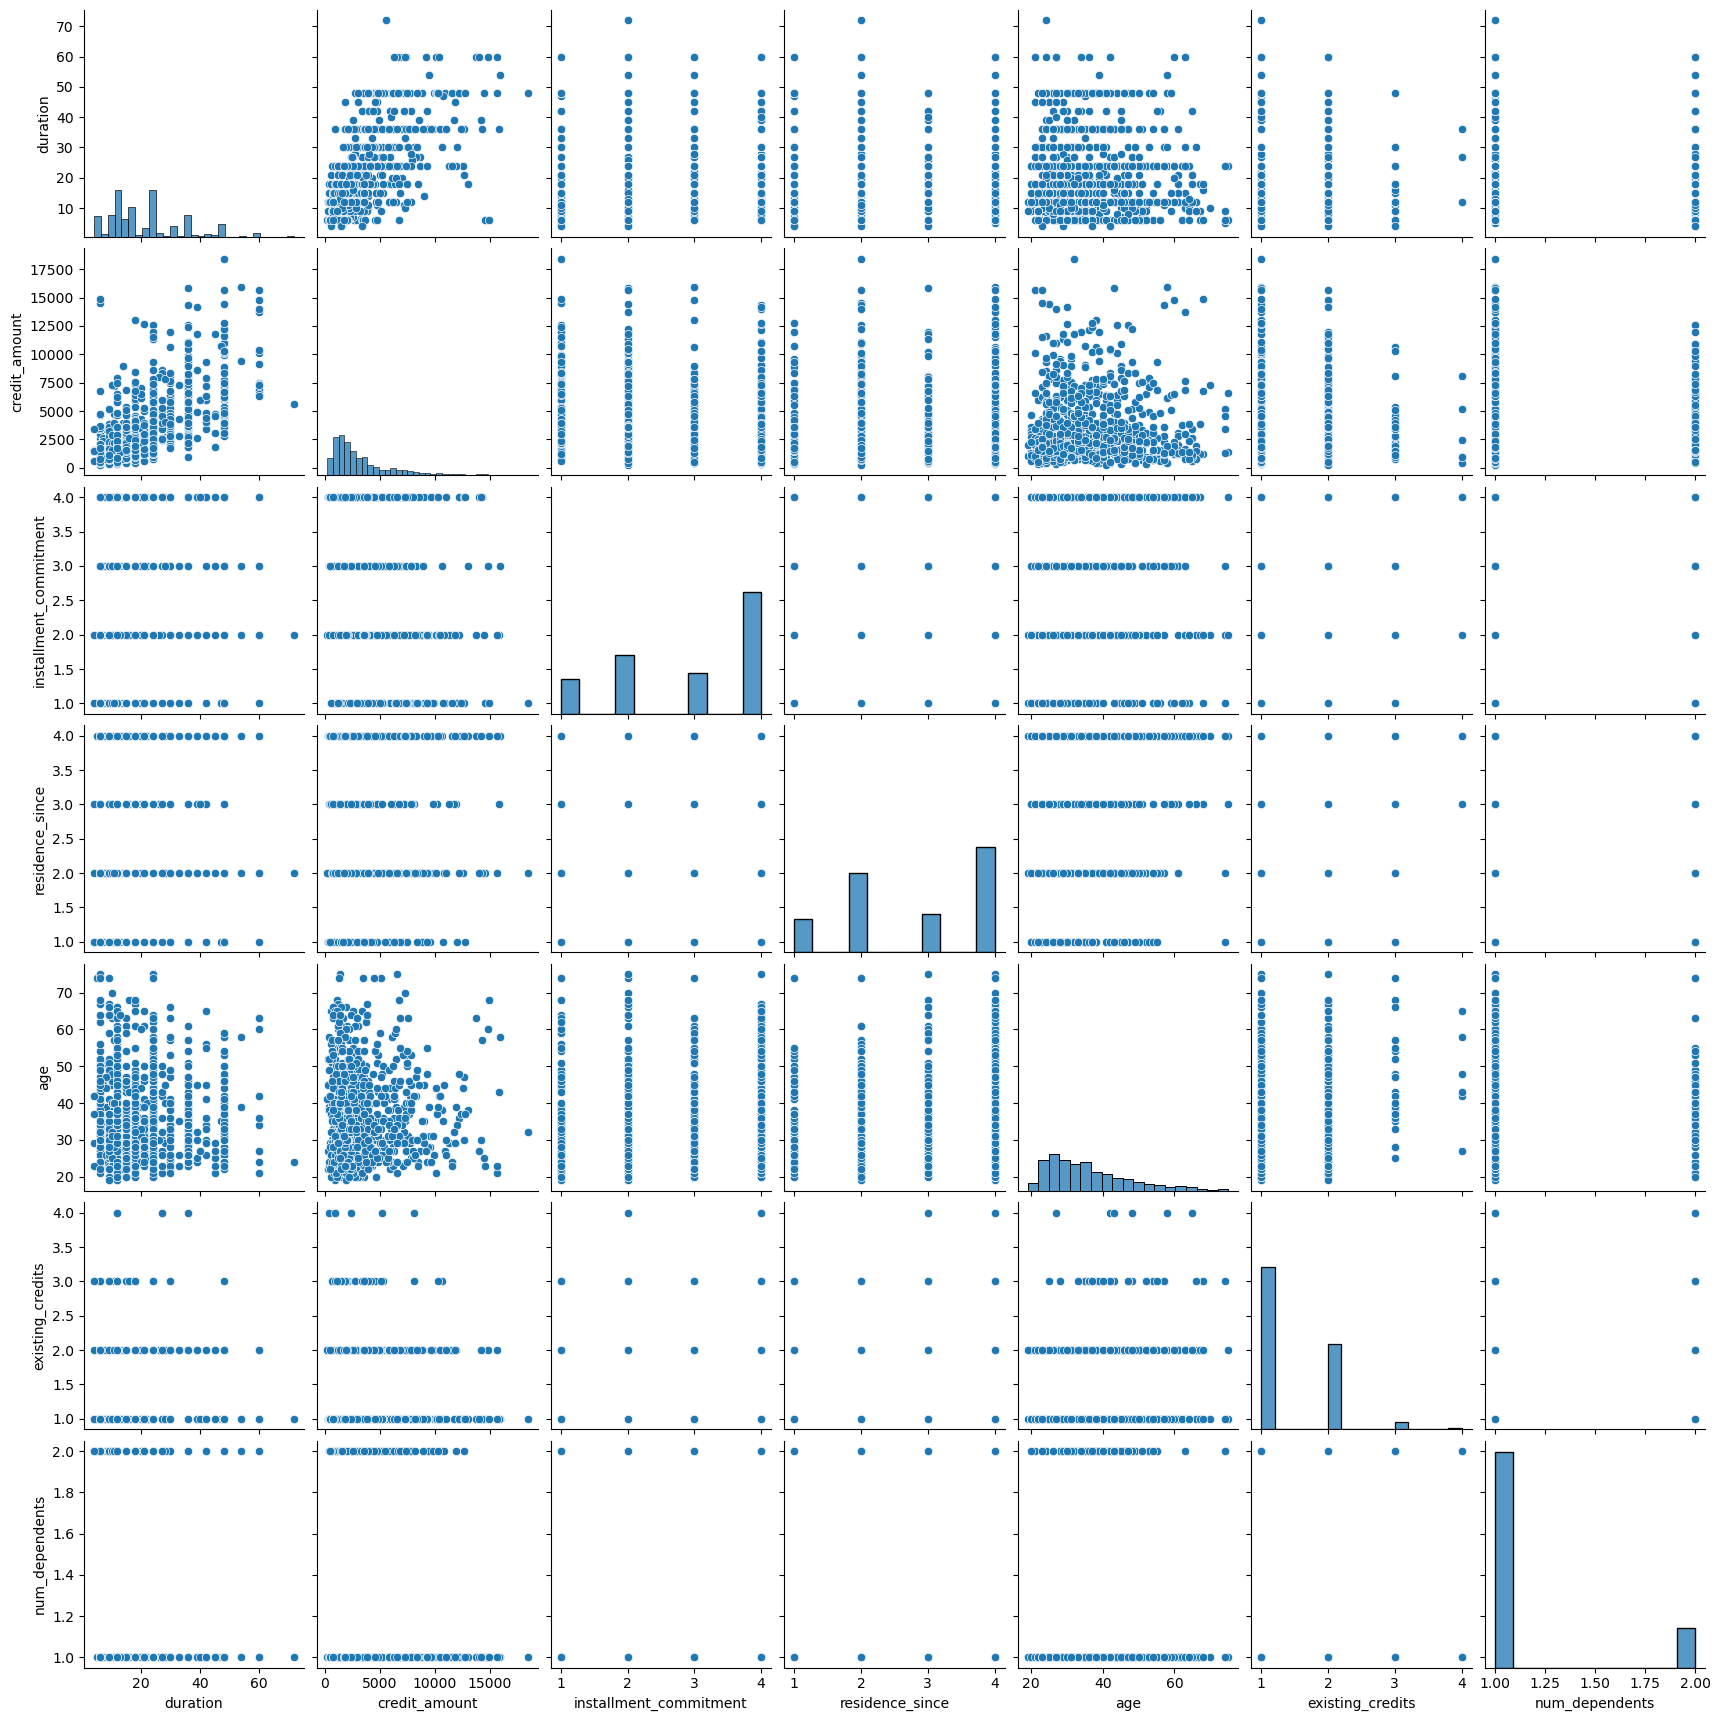

In [205]:
sns.pairplot(df)

In [206]:
df["class"].value_counts()

class
good    700
bad     300
Name: count, dtype: int64

<Axes: ylabel='age'>

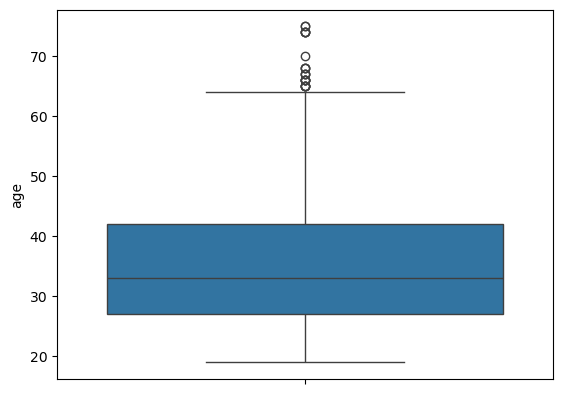

In [207]:
sns.boxplot(df["age"])

<Axes: xlabel='class', ylabel='credit_amount'>

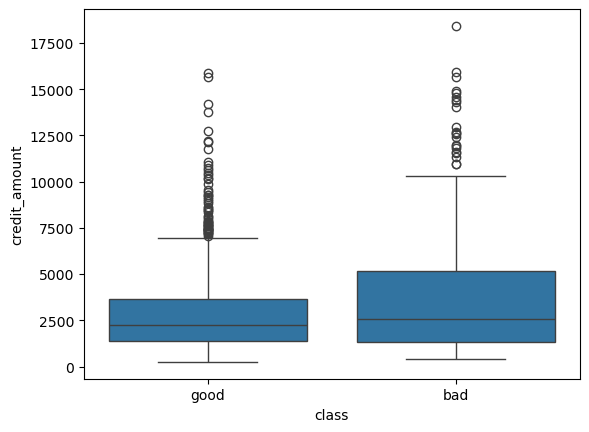

In [208]:

sns.boxplot(x="class",y="credit_amount", data=df)



<Axes: xlabel='class', ylabel='duration'>

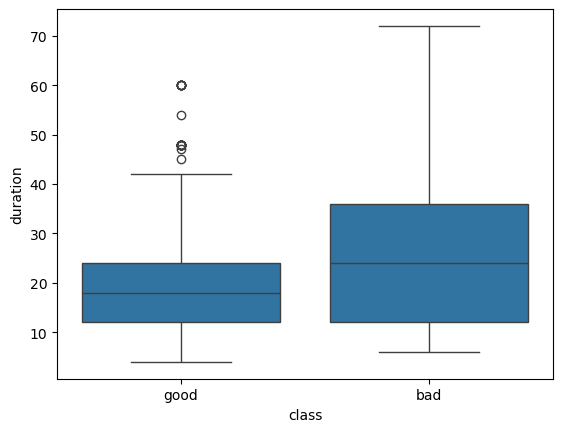

In [209]:
sns.boxplot(x="class",y="duration", data=df)

<Axes: xlabel='class', ylabel='age'>

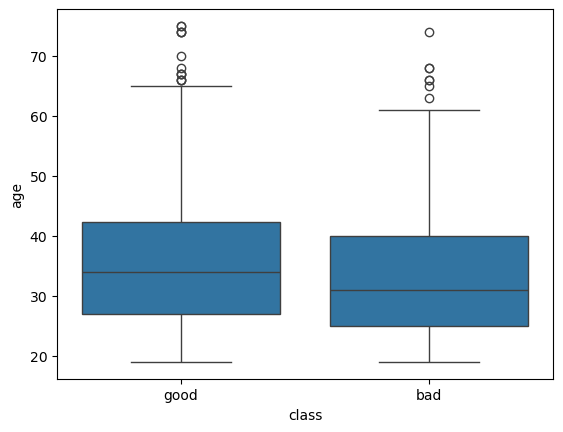

In [210]:
sns.boxplot(x="class",y="age", data=df)

In [211]:
le = LabelEncoder()
df['savings_status'] = le.fit_transform(df['savings_status'])
df['checking_status'] = le.fit_transform(df['checking_status'])
df['credit_history'] = le.fit_transform(df['credit_history'])
df['purpose'] = le.fit_transform(df['purpose'])
df['employment'] = le.fit_transform(df['employment'])
df['property_magnitude'] = le.fit_transform(df['property_magnitude'])
df['housing'] =le.fit_transform(df['housing'])  


In [212]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169,4,3,4,male single,none,...,3,67,none,1,2,skilled,1,yes,yes,good
1,0,48,3,6,5951,2,0,2,female div/dep/mar,none,...,3,22,none,1,1,skilled,1,none,yes,bad
2,3,12,1,2,2096,2,1,2,male single,none,...,3,49,none,1,1,unskilled resident,2,none,yes,good
3,1,42,3,3,7882,2,1,2,male single,guarantor,...,1,45,none,0,1,skilled,2,none,yes,good
4,1,24,2,4,4870,2,0,3,male single,none,...,2,53,none,0,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,10,1736,2,1,3,female div/dep/mar,none,...,3,31,none,1,1,unskilled resident,1,none,yes,good
996,1,30,3,9,3857,2,0,4,male div/sep,none,...,1,40,none,1,1,high qualif/self emp/mgmt,1,yes,yes,good
997,3,12,3,6,804,2,3,4,male single,none,...,0,38,none,1,1,skilled,1,none,yes,good
998,1,45,3,6,1845,2,0,4,male single,none,...,2,23,none,0,1,skilled,1,yes,yes,bad


In [213]:
df["credit_history"].fillna(df["credit_history"].mean())

0      1
1      3
2      1
3      3
4      2
      ..
995    3
996    3
997    3
998    3
999    1
Name: credit_history, Length: 1000, dtype: int64

In [214]:
df["purpose"].fillna(df["purpose"].mean())

0       6
1       6
2       2
3       3
4       4
       ..
995    10
996     9
997     6
998     6
999     9
Name: purpose, Length: 1000, dtype: int64

In [215]:
df["employment"].fillna(df["employment"].mean())

0      3
1      0
2      1
3      1
4      0
      ..
995    1
996    0
997    3
998    0
999    4
Name: employment, Length: 1000, dtype: int64

In [216]:
df["property_magnitude"].fillna(df["property_magnitude"].mean())

0      3
1      3
2      3
3      1
4      2
      ..
995    3
996    1
997    0
998    2
999    0
Name: property_magnitude, Length: 1000, dtype: int64

In [217]:
df["housing"].fillna(df["housing"].mean())

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: housing, Length: 1000, dtype: int64

In [218]:
df["checking_status"].fillna(df["checking_status"].mean())


0      1
1      0
2      3
3      1
4      1
      ..
995    3
996    1
997    3
998    1
999    0
Name: checking_status, Length: 1000, dtype: int64

In [219]:
df["savings_status"].fillna(df["savings_status"].mean())

0      4
1      2
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    0
Name: savings_status, Length: 1000, dtype: int64

In [220]:
#check duplicate 
df.duplicated().sum()

np.int64(0)

In [221]:
##why did you choose this technique ?

##Because they are important values ​​and very few in the classes, I cannot delete them.

In [222]:
##انا عامله الرسومات فوق وفى outlier
df.select_dtypes(include=['number']).corr()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,residence_since,property_magnitude,age,housing,existing_credits,num_dependents
checking_status,1.000000,-0.101129,-0.068084,0.065194,-0.096822,0.044296,-0.005978,0.049927,0.005271,-0.028723,0.093228,-0.078187,0.096889,0.040062
duration,-0.101129,1.000000,0.010379,-0.001296,0.624984,0.029346,0.008956,0.074749,0.034067,-0.112195,-0.036136,-0.073298,-0.011284,-0.023834
credit_history,-0.068084,0.010379,1.000000,-0.034329,0.029545,-0.051554,-0.098123,-0.062471,-0.090131,-0.029544,-0.161070,0.049460,-0.335008,-0.084997
purpose,0.065194,-0.001296,-0.034329,1.000000,0.042529,0.067495,0.070518,0.017263,0.062710,-0.057630,0.039460,-0.032367,-0.029290,0.017879
credit_amount,-0.096822,0.624984,0.029545,0.042529,1.000000,0.079566,0.037984,-0.271316,0.028926,-0.094210,0.032716,-0.069487,0.020795,0.017142
savings_status,0.044296,0.029346,-0.051554,0.067495,0.079566,1.000000,0.050707,0.028616,0.054627,0.087947,0.106727,0.070421,0.026523,0.022286
employment,-0.005978,0.008956,-0.098123,0.070518,0.037984,0.050707,1.000000,0.066897,0.224502,0.060379,0.278838,0.043310,0.080262,0.032475
installment_commitment,0.049927,0.074749,-0.062471,0.017263,-0.271316,0.028616,0.066897,1.000000,0.049302,-0.024771,0.058266,-0.090656,0.021669,-0.071207
residence_since,0.005271,0.034067,-0.090131,0.062710,0.028926,0.054627,0.224502,0.049302,1.000000,0.029227,0.266419,0.049420,0.089625,0.042643
property_magnitude,-0.028723,-0.112195,-0.029544,-0.057630,-0.094210,0.087947,0.060379,-0.024771,0.029227,1.000000,0.131824,0.229272,0.010574,0.078157


In [223]:
df.drop(["credit_history", "duration"], axis=1, inplace=True)

In [224]:
features = df.drop("class", axis=1)
target = df['class']

In [225]:
# Check for Unbalance data
target.value_counts()

class
good    700
bad     300
Name: count, dtype: int64

C:\Users\SHREEN\AppData\Local\Temp\ipykernel_9592\2903724304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df, palette=['#4c72b0', '#c44e52'])


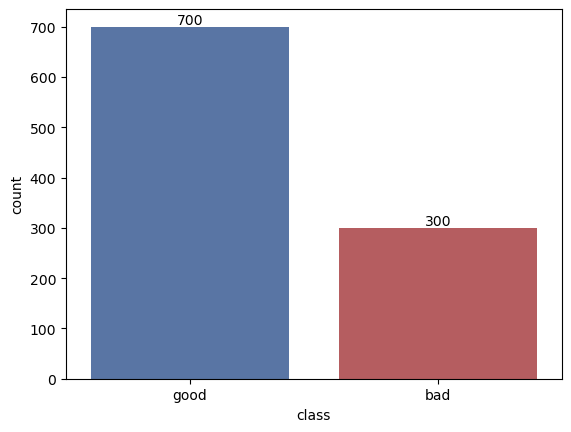

In [226]:
ax = sns.countplot(x='class', data=df, palette=['#4c72b0', '#c44e52'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [227]:

smote = SMOTE()
target_encoded = le.fit_transform(target)
feature_encoded = pd.get_dummies(features)

In [228]:
x_smote, y_smote = smote.fit_resample( feature_encoded,target_encoded )

In [229]:
# I used smote to avoid overfiting & under futung

In [250]:
x_train, x_test, y_train, y_test = train_test_split(
    feature_encoded,
    target_encoded,
    stratify=target,
    random_state=20,
    test_size=0.3
) 

In [251]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test )

In [257]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote,y_smote, test_size=0.2, stratify=y_smote, random_state=42)

In [253]:
sfc = RandomForestClassifier(n_estimators=10)
sfc.fit(x_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [254]:
sfc_smote = RandomForestClassifier(n_estimators=10)
sfc_smote.fit(x_train_smote, y_train_smote)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [256]:
y_pred_smote = sfc_smote.predict(x_test_smote)
y_pred_smote

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])